1.Number of multiplications: n*k*p; Number of additions: n*(k-1)*p

reason: In matrix multiplication, first row of first matrix (n*k) is multiplies with first column of second matrix(k*p).As the number of elements in first row and first column of both matrices is k, the number of multiplications are k and additions are k-1 (to add k numbers we need k-1 add operators). So, for first row and first column, the multiplications are k and additions are k-1. We know that each row of first matrix is multiplies with each column of second matrix and as number of rows and coulumns in first and second matrices are n and p respectvely, the number of multiplication sare n*k*p and additions are n*(k-1)*p.

2. Creating two methods named mul and mul_np where mul is implemeted using lists and mul_np is implemeted using numpy

In [3]:
import numpy as np

In [5]:
def mul(A,B):
    C=[[sum(a * b for a, b in zip(A_r, B_c)) for B_c in zip(*B)]  for A_r in A]
    return C
def mul_np(A,B):
    return A @ B
A=[[1,2,3],[4,5,6],[7,8,9]]
B=[[1,0,0],[0,1,0],[0,0,1]]
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
b=np.array([[1,0,0],[0,1,0],[0,0,1]])
%timeit mul(A,B)
%timeit mul_np(a,b)

            

18.6 µs ± 859 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.81 µs ± 63.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Execution using numpy is faster than list of lists.
Reason:
An array is a collection of homogeneous data-types that are stored in contiguous memory locations. On the other hand, a list in Python is a collection of heterogeneous data types stored in non-contiguous memory locations.
The NumPy package breaks down a task into multiple fragments and then processes all the fragments parallelly.
The NumPy package integrates C, C++, and Fortran codes in Python. These programming languages have very little execution time compared to Python.

3. Finding median using passes requires n/2 passes, thus the time complexity is $O(n^2)$. The better way would be sorting the array and finding the middle element, where time complexity is O(nlogn) i.e. O(nlogn) for sortimg and O(1) for accessing middle element.


In [3]:
def med(b):
    a=b[:]
    length=len(a)
    a=list(b)
    if length%2!=0:
        for i in range(length//2):
            maxi=max(a)
            a.remove(maxi)
        return max(a)
    else:
        for i in range(length//2):
            maxi=max(a)
            a.remove(maxi)
        return (maxi+max(a))/2
def med_better(a):
    b=a[:]
    b.sort()
    middle=len(b)//2
    return (b[middle]+b[~middle])/2
def med_np(a):
    return np.median(a)

a=np.random.randint(1000,size=1000)
%timeit med(a)
%timeit med_better(a)
%timeit med_np(a)
print(med(a),med_better(a),med_np(a))
    

23.9 ms ± 2.79 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.6 µs ± 1.5 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
50 µs ± 3.51 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
493.5 493.5 493.5


first method: med
second method: med_better
As per the implementation, the first method which includes passes is slower compared numpy.median and second method is faster than numpy.median 
performance: med < med_numoy < med_better
    
but it also depends on size of array, if size of array is small, then numpy.median is worse

4.  Gradient of given function is [$2xy+y^3cos(x)$, $x^2+3y^2sin(x)$]


5. Using Jax
Fifth question is written in google colab, as windows in not supporing Jax. Uploaded the same in Git

In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import grad
def paraboloid2(x,y):
    return x**2*y+y**3*jnp.sin(x)

# taking the gradient of paraboloid w.r.t. x 
grad_paraboloid2 = grad(paraboloid2, argnums=(0,1),allow_int=True)
grad_paraboloid2(1.,1.)

ModuleNotFoundError: No module named 'jax'

6. Using sympy

In [189]:
from sympy import *
x,y=symbols('x,y')
f=x**2*y+y**3*sin(x)
Gradient_1 = simplify(derive_by_array(f, (x, y)))
Gradient_1.subs({x:1,y:1})

[cos(1) + 2, 1 + 3*sin(1)]

Gradient obtained without python is [$2xy+y^3cos(x)$, $x^2+3y^2sin(x)$]. The same equations is substituted with x=1 and y=1, the obtained answer is same as sympy and is shown below

In [188]:
g=[2*x*y+y**3*cos(x),x**2+3*y**2*sin(x)]
[g[0].subs([(x,1),[y,1]]),g[1].subs([(x,1),(y,1)])]

[cos(1) + 2, 1 + 3*sin(1)]

7. Netsted Dictionaries

In [5]:
nest_dict={2022:
           {'Branch 1':
            {'Roll_number':22210036,'Name':'Krishna','Marks':
             {'Maths':10,'English':10,'Physics':10}},
            'Branch 2':
            {'Roll_number':22210038,'Name':'sai','Marks':
             {'Maths':9,'English':8,'Physics':7}}}, 
            2023:{'Branch 1':
            {'Roll_number':22210036,'Name':'Krishna','Marks':
             {'Maths':10,'English':10,'Physics':10}},
            'Branch 2':
            {'Roll_number':22210038,'Name':'sai','Marks':
             {'Maths':9,'English':8,'Physics':7}}},
           2024:{'Branch 1':
            {'Roll_number':22210036,'Name':'Krishna','Marks':
             {'Maths':10,'English':10,'Physics':10}},
            'Branch 2':
            {'Roll_number':22210038,'Name':'sai','Marks':
             {'Maths':9,'English':8,'Physics':7}}},
           2025:{'Branch 1':
            {'Roll_number':22210036,'Name':'Krishna','Marks':
             {'Maths':10,'English':10,'Physics':10}},
            'Branch 2':
            {'Roll_number':22210038,'Name':'sai','Marks':
             {'Maths':9,'English':8,'Physics':7}}}
          }

8. Storing above same information using classes

In [53]:
class Marks():
    def __init__(self,marks):
        self.math,self.english,self.physics=marks
class Students():
    def __init__(self,name,number,marks):
        self.name=name
        self.rollnumber=number
        self.marks=Marks(marks)
class Branches():
        def __init__(self,b):
            self.branch_name=b
            self.students=[]
            student_names=['krishna','sai']
            student_rollno=[22210036,22210038]
            student_marks=[[10,10,10],[9,8,7]]
            for i in range(len(student_names)):
                self.students.append(Students(student_names[i],student_rollno[i],student_marks[i]))
class Year():
    def __init__(self,year):
        self.year=year
        self.branches=[]
        for i in range(2):
            self.branches.append(Branches('Branch '+str(i+1)))
years=[Year(2022),Year(2023),Year(2024),Year(2025)]

2022


9. plottind using matplotlib

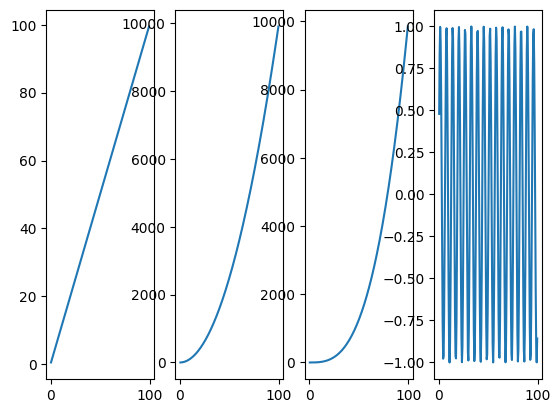

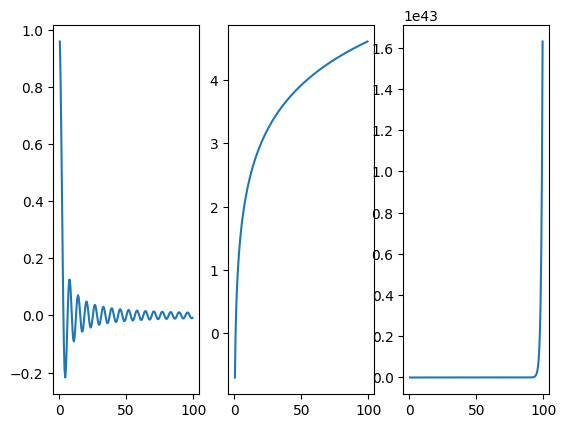

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
x=np.arange(0.5,100.0,0.5)
y1=x
y2=x*x
y3=(x**3)/100
y4=np.sin(x)
y5=np.sin(x)/x
y6=np.log(x)
y7=np.exp(x)
figure, axis = plt.subplots(1, 4)
axis[0].plot(x,y1)
axis[1].plot(x,y2)
axis[2].plot(x,y3)
axis[3].plot(x,y4)
figure,axis1=plt.subplots(1,3)
axis1[0].plot(x,y5)
axis1[1].plot(x,y6)
axis1[2].plot(x,y7)
plt.show()

10. Create Pandas dataframe

In [103]:
import pandas as pd
np.random.seed(42)
df=pd.DataFrame(np.random.uniform(1,2,[20,5]),columns=['a','b','c','d','e'])
df_std=df.std()
maxi_std=max(df_std)
for i,j in df_std.items():
    if j==maxi_std:
        column=i
print('Max Standard Deviation column:',column,'and its value is:',maxi_std) #max standard deviation column
df_mean=df.mean(axis=1)
min_mean=min(df_mean)
for i,j in df_mean.items():
    if j==min_mean:
        column=i
print('Minimum mean row:',column,'and its value is:',min_mean) #min mean row

Max Standard Deviation column: c and its value is: 0.31862833120007994
Minimum mean row: 11 and its value is: 1.3153814438335967


11. Adding new columns f and g

In [118]:
df['f']= df.loc[:,['a','b','c','d','e']].sum(axis=1)
df['g']=np.where(df['f']>8,'GT8','LT8')
df['g'].value_counts()['LT8']
df_LT8=df.loc[df['g']=='LT8']
df_GT8=df.loc[df['g']=='GT8']
print('standard deviation of LT8 f column:',df_LT8['f'].std())
print('standard deviation of GT8 f column:',df_GT8['f'].std())

standard deviation of LT8 f column: 0.4025886500663061
standard deviation of GT8 f column: 0.7956146881961926


12. Broadcasting is nothing but doing operations on each element of ndimension array easily. 

In [132]:
np.random.seed(42)
a=np.random.randint(5,size=6)
print('before broadcasting')
print(a)
print('after broadcasting')
print(a+5)

before broadcasting
[3 4 2 4 4 1]
after broadcasting
[8 9 7 9 9 6]


In the above example we can see that adding 5 to array a is adding it each and every element in a. silmilarly it can be done between two arrays as well.

In [133]:
b=np.random.randint(5,size=(2,3))
print('before broadcasting')
print(b)
print('after broadcasting')
print(b+5)

before broadcasting
[[2 2 2]
 [4 3 2]]
after broadcasting
[[7 7 7]
 [9 8 7]]


It also applies same for multi-dimensional arrays.

13. Created argmin function by passsing numpy array

In [130]:
np.random.seed(42)
def argmin(arr):
    mini=arr[0]
    for i in range(len(arr)):
        if arr[i]<=mini:
            mini=arr[i]
            index=i
    return index
arr=np.random.randint(50,size=20)
print(np.argmin(arr)==argmin(arr))
%timeit argmin(arr)
%timeit np.argmin(arr)
        

True
3.43 µs ± 97.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.02 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
